In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [66]:
import os

# 指定文件夹路径
folder_path = 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation'  # 替换为实际的文件夹路径

# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        # 删除文件
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f'Successfully deleted file: {file_path}')
        # 删除文件夹
        elif os.path.isdir(file_path):
            os.rmdir(file_path)
            print(f'Successfully deleted folder: {file_path}')
    except Exception as e:
        print(f'Error deleting file/folder: {file_path}, {e}')


Successfully deleted file: C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation\lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_4.csv
Successfully deleted file: C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation\read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_11.csv
Successfully deleted file: C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation\read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_12.csv
Successfully deleted file: C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation\read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_13.csv
Successfully deleted file: C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation\read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_6.csv
Successfully deleted file: C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation\read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_7.csv
Successfully deleted file: C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation\read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_1.csv
Successfully 

In [67]:
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata/slice_data')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata\slice_data")
for file_name in file_list:
     data = pd.read_csv(os.path.join(r"C:\Users\a1882\Desktop\EEG\eegdata\slice_data",file_name), header=1)
     # concate each row
     data = data.iloc[:, :].values.reshape(-1).T
     data = pd.DataFrame(data)
     data.to_csv(os.path.join(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\reshape",file_name), index=False)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG\eegdata\slice_data


In [68]:
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/reshape')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\reshape")
for file_name in file_list:
    print(file_name)
    data = pd.read_csv(os.path.join(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\reshape",file_name))
    print(data.shape)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG\eegdata\slice_data
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_0.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_1.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_10.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_11.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_12.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_13.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_14.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_2.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_3.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_4.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_5.csv
(31000, 1)
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_6

In [34]:
import sys
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\reshape')
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\train')
sys.path.append('C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\validation')
sys.path

['C:\\Program Files\\JetBrains\\PyCharm 2022.3.3\\plugins\\python\\helpers-pro\\jupyter_debug',
 'C:\\Program Files\\JetBrains\\PyCharm 2022.3.3\\plugins\\python\\helpers\\pydev',
 'C:\\Users\\a1882\\Desktop\\EEG',
 'C:\\Users\\a1882\\Desktop\\EEG',
 'C:\\Users\\a1882\\anaconda3\\python310.zip',
 'C:\\Users\\a1882\\anaconda3\\DLLs',
 'C:\\Users\\a1882\\anaconda3\\lib',
 'C:\\Users\\a1882\\anaconda3',
 '',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\site-packages\\win32\\lib',
 'C:\\Users\\a1882\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\loc

In [30]:
a = np.random.rand(3,3)
print(a)
a = pd.DataFrame(a)
a = a.iloc[:, :].values.reshape(-1)
print(a)

[[0.29572005 0.85288176 0.89854898]
 [0.16716521 0.42330009 0.12438307]
 [0.86831281 0.43400537 0.94378236]]
[0.29572005 0.85288176 0.89854898 0.16716521 0.42330009 0.12438307
 0.86831281 0.43400537 0.94378236]


In [69]:
import os
import random
import pandas as pd
import random
import shutil
file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/reshape')
# 设置训练集和验证集的比例
train_ratio = 0.8
valid_ratio = 0.2

# 定义CSV文件所在的目录和训练集、验证集的目录
csv_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\reshape'
train_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\train'
valid_dir = 'C:\\Users\\a1882\\Desktop\\EEG\\eegdata_rnn\\validation'

num_files = len([f for f in os.listdir(csv_dir) if os.path.isfile(os.path.join(csv_dir, f))])
# 获取所有的CSV文件
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

    # 计算训练集和验证集的数据量
train_size = int(train_ratio * num_files)
valid_size = int(valid_ratio * num_files)


# 随机抽取文件并将其复制到训练集或验证集中
for file in file_list:
    if random.uniform(0, 1) < train_ratio and train_size > 0:
        shutil.copy(os.path.join(csv_dir, file), os.path.join(train_dir, file))
        train_size -= 1
    elif valid_size > 0:
        shutil.copy(os.path.join(csv_dir, file), os.path.join(valid_dir, file))
        valid_size -= 1
    else:
        break

print(train_size)
print(valid_size)

45
0


In [4]:
train_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/train')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\train")
for train_file_name in train_file_list:
    print(train_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_0.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_1.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_10.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_11.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_12.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_13.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_14.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_2.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_4.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_5.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_6.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_7.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_9.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_0.csv
l

In [5]:
train_labels = []
for train_file_name in train_file_list:
    train_labels.append(train_file_name.split('_')[0])

print(train_labels)
print(train_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4 ,'walkfocus': 5}

encode_labels  = [label_map[train_label] for train_label in train_labels]

train_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 're

In [6]:
valid_file_list = os.listdir('C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation')
saved_path = os.getcwd()
print("Current Working Directory is " + saved_path)
os.chdir(r"C:\Users\a1882\Desktop\EEG\eegdata_rnn\validation")
for valid_file_name in valid_file_list:
    print(valid_file_name)
os.chdir(saved_path)

Current Working Directory is C:\Users\a1882\Desktop\EEG
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_3.csv
lefthand_zyy_04_epocflex_2023.03.22t16.48.29+08.00.md.bp.csv_8.csv
lefthand_zyy_05_epocflex_2023.03.22t16.50.54+08.00.md.bp.csv_14.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_13.csv
read_bke_01_epocflex_2023.03.22t15.41.00+08.00.md.bp.csv_2.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_1.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_18.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_20.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_26.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_3.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_30.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_31.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_32.csv
read_bke_02_epocflex_2023.03.22t15.48.25+08.00.md.bp.csv_36.csv
read_bke_02_epocflex_2023.03.22t15.48.25+

In [7]:
os.chdir(saved_path)
valid_labels = []
for valid_file_name in valid_file_list:
    valid_labels.append(valid_file_name.split('_')[0])

print(valid_labels)
print(valid_labels[3])

label_map = {'lefthand': 0, 'read': 1, 'rest': 2, 'walkbase': 3, 'walkl': 4, 'walkfocus': 5}

encode_labels = [label_map[valid_label] for valid_label in valid_labels]

valid_label = torch.tensor(encode_labels, dtype=torch.int64)

['lefthand', 'lefthand', 'lefthand', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'read', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'rest', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkbase', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfocus', 'walkfoc

In [8]:
class EEGDataset(Dataset):
    def __init__(self, filelist, root_dir,data_label,transform=None):
        self.filelist = filelist
        self.root_dir = root_dir
        self.data_label = data_label
        self.transform = transform


    def __len__(self):
        return len(self.filelist)

    def __getitem__(self, index):
        #print('index:', index, 'len(self.filelist):', len(self.filelist), 'len(self.data_label):', len(self.data_label))
        data_label = self.data_label[index]
        file_path = os.path.join(self.root_dir, self.filelist[index])
        eeg_data = np.array(pd.read_csv(file_path)).T
        return eeg_data, data_label

In [9]:
train_unique_objects = set(train_labels)
train_class_number = len(train_unique_objects)
print(train_class_number)

valid_unique_objects = set(valid_labels)
valid_class_number = len(valid_unique_objects)
print(valid_class_number)

6
6


In [10]:
train_dataset = EEGDataset(train_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/train', train_label)
valid_dataset = EEGDataset(valid_file_list, 'C:/Users/a1882/Desktop/EEG/eegdata_rnn/validation', valid_label)

In [11]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

In [12]:
# train_object, train_labels = next(iter(train_loader))
# print(f"Feature batch shape: {train_object.size()}")
# print(f"Labels batch shape: {train_object.size()}")
# img = train_object[0].squeeze()
# label = train_labels[0]
# plt.imshow(img)
# plt.show()
# print(f"Label: {label}")

In [13]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.cuda.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [14]:
time_step = 1000
sample_rate = 128

In [15]:
class EEG_RNN_Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(EEG_RNN_Net, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # 初始化隐藏层
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # 取最后一个时间步的输出，作为最终输出
        return out

In [16]:
model = EEG_RNN_Net(input_size=31000, hidden_size=128, output_size=10, num_layers=2).to(device)
print(model)

EEG_RNN_Net(
  (rnn): RNN(31000, 128, num_layers=2, batch_first=True)
  (fc): Linear(in_features=128, out_features=10, bias=True)
)


In [17]:
X = torch.rand(1, 1, 31000, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8])


In [31]:
learning_rate = 0.001
batch_size = 64
num_epochs = 30
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [32]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        # Compute prediction error
        pred = model(X.float())
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            global train_loss
            train_loss.append(loss)
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error:\n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    global valid_loss
    valid_loss.append(test_loss)

In [30]:
torch.cuda.empty_cache()
model = EEG_RNN_Net(input_size=31000, hidden_size=128, output_size=10, num_layers=2).to(device)

In [33]:
train_loss = []
valid_loss = []
for t in range(num_epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    model.train(True)
    train(train_loader, model, loss_fn, optimizer)
    model.train(False)
    test(valid_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.383581  [    0/  533]
Test Error:
 Accuracy: 45.1%, Avg loss: 1.833572 

Epoch 2
-------------------------------
loss: 1.915312  [    0/  533]
Test Error:
 Accuracy: 55.6%, Avg loss: 1.656232 

Epoch 3
-------------------------------
loss: 1.556945  [    0/  533]
Test Error:
 Accuracy: 59.7%, Avg loss: 1.477804 

Epoch 4
-------------------------------
loss: 1.390135  [    0/  533]
Test Error:
 Accuracy: 60.4%, Avg loss: 1.281882 

Epoch 5
-------------------------------
loss: 1.271232  [    0/  533]
Test Error:
 Accuracy: 60.4%, Avg loss: 1.206376 

Epoch 6
-------------------------------
loss: 1.282967  [    0/  533]
Test Error:
 Accuracy: 65.3%, Avg loss: 1.129888 

Epoch 7
-------------------------------
loss: 1.153270  [    0/  533]
Test Error:
 Accuracy: 65.3%, Avg loss: 1.198541 

Epoch 8
-------------------------------
loss: 1.035124  [    0/  533]
Test Error:
 Accuracy: 63.9%, Avg loss: 1.028564 

Epoch 9
------------------------

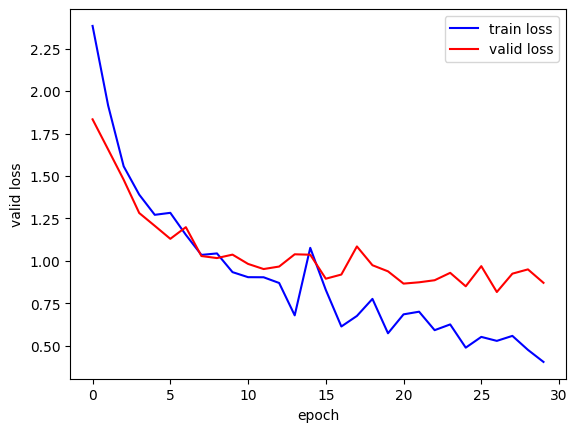

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure()
plt.plot(train_loss,'b',label='train loss')
plt.ylabel('train loss')
plt.xlabel('epoch')
plt.plot(valid_loss,'r',label='valid loss')
plt.ylabel('valid loss')
plt.xlabel('epoch')
plt.legend()

#plt.save(os.path.join('C:/User/a1882/Desktop/EEG','loss.png'))
plt.show()